In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv("WorldCupShootouts_1.csv", dtype=np.float32)
df

,Zone,Foot,Keeper,Goal
0,7.0,0.3,0.3,1.0
1,9.0,0.3,0.5,1.0
2,6.0,0.3,0.8,1.0
3,2.0,0.3,0.5,1.0
4,9.0,0.3,0.8,1.0
...,...,...,...,...
274,7.0,0.3,0.8,1.0
275,7.0,0.3,0.3,1.0
276,4.0,0.3,0.3,1.0
277,7.0,0.3,0.3,1.0


In [126]:
df.shape

(279, 4)

In [127]:
df.loc[:, df.columns != 'Goal'].values

array([[7. , 0.3, 0.3],
       [9. , 0.3, 0.5],
       [6. , 0.3, 0.8],
       [2. , 0.3, 0.5],
       [9. , 0.3, 0.8],
       [4. , 0.3, 0.8],
       [8. , 0.8, 0.8],
       [3. , 0.3, 0.3],
       [9. , 0.3, 0.8],
       [9. , 0.3, 0.5],
       [7. , 0.3, 0.8],
       [9. , 0.3, 0.5],
       [4. , 0.3, 0.8],
       [2. , 0.3, 0.3],
       [6. , 0.3, 0.3],
       [6. , 0.3, 0.3],
       [8. , 0.3, 0.8],
       [9. , 0.8, 0.3],
       [4. , 0.8, 0.3],
       [1. , 0.3, 0.3],
       [7. , 0.3, 0.8],
       [7. , 0.3, 0.3],
       [1. , 0.8, 0.3],
       [6. , 0.8, 0.8],
       [8. , 0.8, 0.8],
       [8. , 0.3, 0.8],
       [7. , 0.3, 0.8],
       [7. , 0.3, 0.8],
       [4. , 0.3, 0.8],
       [7. , 0.3, 0.3],
       [9. , 0.3, 0.8],
       [7. , 0.3, 0.8],
       [4. , 0.3, 0.3],
       [1. , 0.3, 0.8],
       [7. , 0.3, 0.3],
       [1. , 0.3, 0.8],
       [5. , 0.8, 0.3],
       [1. , 0.3, 0.3],
       [5. , 0.3, 0.8],
       [3. , 0.8, 0.3],
       [2. , 0.8, 0.3],
       [9. , 0.3

In [128]:
df['Goal'].values

array([1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0.

In [133]:
from sklearn.model_selection import train_test_split

# Seperate the features and labels
label = df.Goal.values
features = df.loc[:, df.columns != 'Goal'].values/10

# Split into training and test set
train_x, test_x, train_y, test_y = train_test_split(features, label, test_size=0.2, random_state=0)

In [130]:
print(train_y)

[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0.]


In [108]:
print(train_x.shape)
print(train_y.shape)

print(train_x.dtype)
print(train_y.dtype)

(223, 3)
(223,)
float32
float32


In [109]:
print(test_x.shape)
print(test_y.shape)

print(test_x.dtype)
print(test_y.dtype)

(56, 3)
(56,)
float32
float32


In [110]:
from torch.utils.data import DataLoader, Dataset

class custom_data(Dataset):
    def __init__(self, data, targets):
        self.x = data
        self.y = targets
    
    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]

        return x, y

trainset_custom = custom_data(train_x, train_y)

batch = 8

trainloader = DataLoader(trainset_custom, batch_size = batch, shuffle = True)

kick, result = next(iter(trainloader))

In [118]:
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 250)
        self.fc4 = nn.Linear(250, 1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        x = F.sigmoid(self.fc4(x))

        return x

model = Model()
model

Model(
  (fc1): Linear(in_features=3, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=250, bias=True)
  (fc4): Linear(in_features=250, out_features=1, bias=True)
)

In [119]:
from torchsummary import summary

summary(model, (1, 3), device = 'cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 1, 1000]           4,000
            Linear-2               [-1, 1, 500]         500,500
            Linear-3               [-1, 1, 250]         125,250
            Linear-4                 [-1, 1, 1]             251
Total params: 630,001
Trainable params: 630,001
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.40
Estimated Total Size (MB): 2.42
----------------------------------------------------------------


In [134]:
tr_x = torch.from_numpy(train_x).view(-1, 3)
tr_y = torch.from_numpy(train_y).view(-1, 1)

te_x = torch.from_numpy(test_x).view(-1, 3)
te_y = torch.from_numpy(test_y).view(-1, 1)

train = torch.utils.data.TensorDataset(tr_x, tr_y)
test = torch.utils.data.TensorDataset(te_x, te_y)

batch = 8
trainloader = DataLoader(train, batch_size = batch, shuffle = True)
testloader = DataLoader(test, batch_size = batch, shuffle = True)

In [135]:
epochs = 50
lr = 0.001
train_loss, test_loss = [], []
steps = 10

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [136]:
from tqdm import tqdm

for epoch in range(epochs):
    total_loss = 0
    for i, (kick, results) in enumerate(tqdm(trainloader)):
        predict = model(kick)
        loss = criterion(predict, results)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    if epoch % steps == 0:
        te_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for j, (kick, results) in enumerate(testloader):
                predict = model(kick)
                te_loss += criterion(predict, results)
        
        train_loss.append(total_loss/len(trainloader))
        test_loss.append(te_loss/len(testloader))

        model.train()

        print("Epoch: {}/{}.. ".format(epoch, epochs),
                "Training Loss: {:.3f}.. ".format(train_loss[-1]),
                "Test Loss: {:.3f}.. ".format(test_loss[-1]))

100%|██████████| 28/28 [00:00<00:00, 184.61it/s]


Epoch: 0/50..  Training Loss: 0.619..  Test Loss: 0.598.. 


100%|██████████| 28/28 [00:00<00:00, 332.71it/s]


Epoch: 10/50..  Training Loss: 0.616..  Test Loss: 0.599.. 


100%|██████████| 28/28 [00:00<00:00, 345.62it/s]


Epoch: 20/50..  Training Loss: 0.616..  Test Loss: 0.599.. 


100%|██████████| 28/28 [00:00<00:00, 356.56it/s]


Epoch: 30/50..  Training Loss: 0.615..  Test Loss: 0.599.. 


100%|██████████| 28/28 [00:00<00:00, 377.84it/s]


Epoch: 40/50..  Training Loss: 0.616..  Test Loss: 0.599.. 


100%|██████████| 28/28 [00:00<00:00, 188.87it/s]


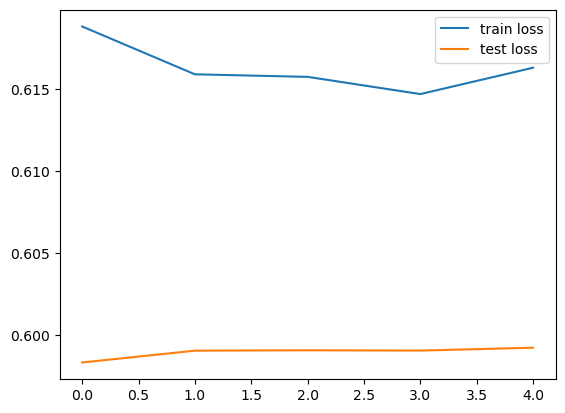

In [137]:
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.show()

In [138]:
from sklearn.metrics import accuracy_score

model.eval()

acc = 0
for j, (kick, results) in enumerate(testloader):
    predict = model(kick)
    acc += accuracy_score(results, torch.argmax(predict, axis=1))

acc = acc / (j+1)
print(acc)

0.2857142857142857
